# Unit 5 - Financial Planning


In [23]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import numpy as np
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import io

%matplotlib inline

In [24]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [25]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3


In [26]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"
response_btc_url = requests.get(btc_url)
response_eth_url = requests.get(eth_url)

In [27]:
response_btc = response_btc_url.json()
response_eth = response_eth_url.json()

In [28]:
# Fetch current BTC price
current_btc_price = response_btc['data']['1']['quotes']['USD']['price']

# Fetch current ETH price
current_eth_price = response_eth['data']['1027']['quotes']['USD']['price']

# Compute current value of my crpto
my_btc_value = current_btc_price * my_btc
my_eth_value = current_eth_price * my_eth
total_crypto = my_btc_value + my_eth_value

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")
print(f"The total value of your crypto is ${total_crypto:0.2f}")

The current value of your 1.2 BTC is $53802.00
The current value of your 5.3 ETH is $18015.76
The total value of your crypto is $71817.76


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [29]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [30]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_API_SECRET")
# Create the Alpaca API object
alpaca_trade = tradeapi.REST(alpaca_api_key,alpaca_secret_key)
type(alpaca_api_key)

str

In [31]:
# Format current date as ISO format
start = pd.Timestamp("2021-05-14", tz= 'US/Pacific').isoformat()
end = pd.Timestamp("2021-05-14", tz= 'US/Pacific').isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
agg_df = alpaca_trade.get_barset(tickers, timeframe, start=start, end=end).df
spy_df = alpaca_trade.get_barset(tickers, timeframe, start=start, end=end).df
# Preview DataFrame
agg_df
spy_df

AGG                                       SPY  \
                             open    high       low   close   volume   open   
time                                                                          
2021-05-14 00:00:00-04:00  114.22  114.28  114.1219  114.28  3711363  413.2   

                                                             
                             high     low   close    volume  
time                                                         
2021-05-14 00:00:00-04:00  417.49  413.18  416.53  69012933

In [32]:
# Pick AGG and SPY close prices
agg_close_price =agg_df["AGG"]["close"][-1]
spy_close_price =spy_df["SPY"]["close"][-1]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.28
Current SPY closing price: $416.53


In [33]:
# Compute the current value of shares
my_agg_value = agg_close_price * my_agg
my_spy_value = spy_close_price * my_spy
total_stocks = my_agg_value + my_spy_value


# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")
print(f"The current value of your stock shares are ${total_stocks:0.2f}")

The current value of your 50 SPY shares is $20826.50
The current value of your 200 AGG shares is $22856.00
The current value of your stock shares are $43682.50


### Savings Health Analysis

In [34]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
df_savings = pd.DataFrame(data=[total_crypto, total_stocks],index=['crypto', 'shares'], columns=['amount'])

# Display savings DataFrame
display(df_savings)

,amount
crypto,71817.76
shares,43682.50


array([<AxesSubplot:ylabel='amount'>], dtype=object)

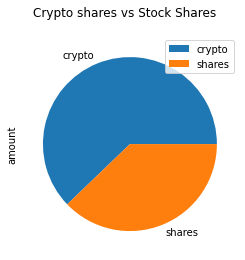

In [35]:
# Plot savings pie chart
df_savings.plot(subplots=True,kind="pie",title="Crypto shares vs Stock Shares")

In [36]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = total_stocks + total_crypto
cover_amount = emergency_fund - total_savings
# Validate saving health
if total_savings >= emergency_fund:
    print("Congratulations! You have enough money in your emergency fund!")
else:
    total_savings < emergency_fund
    print(f"You are currently ${cover_amount} away from reaching your goal. ")

Congratulations! You have enough money in your emergency fund!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [37]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [38]:
# Get 5 years' worth of historical data for SPY and AGG
tickers = ["SPY","AGG"]

df_stock_data =alpaca_trade.get_barset(tickers, timeframe, start= start_date,end= end_date, limit=1000 ).df

# Display sample data
df_stock_data.head()

AGG                                          \
                             open      high       low    close     volume   
time                                                                        
2016-08-17 00:00:00-04:00  112.45  112.6600  112.3600  112.580  3136737.0   
2016-08-18 00:00:00-04:00  112.64  112.7799  112.5350  112.705  1814107.0   
2016-08-19 00:00:00-04:00  112.53  112.6200  112.3900  112.490  2961016.0   
2016-08-22 00:00:00-04:00  112.66  112.7380  112.5600  112.650  1647564.0   
2016-08-23 00:00:00-04:00  112.78  112.8250  112.6301  112.690  2197732.0   

                              SPY                                      
                             open    high     low   close      volume  
time                                                                   
2016-08-17 00:00:00-04:00     NaN     NaN     NaN     NaN         NaN  
2016-08-18 00:00:00-04:00  218.33  218.90  218.21  218.87  42850145.0  
2016-08-19 00:00:00-04:00  218.31  218.75  217.74  218.57  52238224.0  
2016-08-22 00:00:00-04:00  218.27  218.80  217.83  218.50  48628907.0  
2016-08-23 00:00:00-04:00  219.25  219.60  218.90  218.94  41981207.0

In [39]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
mc_thirtyyear = MCSimulation(df_stock_data,[0.6,0.4], 500, 252*30)

In [40]:
# Printing the simulation input data
mc_thirtyyear.portfolio_data.head()

AGG                                          \
                             open      high       low    close     volume   
time                                                                        
2016-08-17 00:00:00-04:00  112.45  112.6600  112.3600  112.580  3136737.0   
2016-08-18 00:00:00-04:00  112.64  112.7799  112.5350  112.705  1814107.0   
2016-08-19 00:00:00-04:00  112.53  112.6200  112.3900  112.490  2961016.0   
2016-08-22 00:00:00-04:00  112.66  112.7380  112.5600  112.650  1647564.0   
2016-08-23 00:00:00-04:00  112.78  112.8250  112.6301  112.690  2197732.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2016-08-17 00:00:00-04:00          NaN     NaN     NaN     NaN     NaN   
2016-08-18 00:00:00-04:00     0.001110  218.33  218.90  218.21  218.87   
2016-08-19 00:00:00-04:00    -0.001908  218.31  218.75  217.74  218.57   
2016-08-22 00:00:00-04:00     0.001422  218.27  218.80  217.83  218.50   
2016-08-23 00:00:00-04:00     0.000355  219.25  219.60  218.90  218.94   

                                                    
                               volume daily_return  
time                                                
2016-08-17 00:00:00-04:00         NaN          NaN  
2016-08-18 00:00:00-04:00  42850145.0          NaN  
2016-08-19 00:00:00-04:00  52238224.0    -0.001371  
2016-08-22 00:00:00-04:00  48628907.0    -0.000320  
2016-08-23 00:00:00-04:00  41981207.0     0.002014

In [41]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
mc_thirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.994476,1.001145,0.997784,0.993379,0.999743,0.996711,1.006167,1.001961,1.001371,1.005116,...,1.001583,1.002543,1.004085,1.005441,0.996332,1.004121,1.001247,1.001104,0.996754,0.994803
2,1.000724,1.003075,0.991290,0.991278,0.996059,0.991885,1.011982,1.008992,1.001627,1.007631,...,1.004878,0.999908,0.995595,1.002009,0.995612,1.004501,0.996627,1.006044,0.990509,0.993008
3,1.000806,1.002029,0.995494,0.989759,0.986452,0.989632,1.006019,1.009763,0.999794,1.013186,...,1.008178,1.000600,1.002318,1.004444,0.996626,1.002620,0.995094,1.009762,0.996531,0.998599
4,0.993008,0.995575,0.999085,0.989492,0.988032,0.988769,1.015979,1.016312,1.004359,1.009954,...,1.008801,1.000179,1.009099,0.993827,0.998544,1.000939,1.004631,1.008687,1.005118,0.998087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,6.205847,4.694308,6.430775,7.893234,6.056604,3.853250,10.592692,5.941632,4.440654,5.001852,...,2.407290,5.690130,3.035688,6.698863,10.267420,14.394794,2.253208,5.342187,6.809619,4.545646
7557,6.186619,4.682469,6.394487,7.878388,6.069695,3.837139,10.586018,5.916876,4.452623,4.967289,...,2.413559,5.660993,3.027231,6.688272,10.312494,14.513247,2.250147,5.333203,6.840850,4.553561
7558,6.168170,4.636275,6.431976,7.897734,6.081746,3.823176,10.525098,5.932739,4.446600,4.966632,...,2.430356,5.651462,3.031632,6.715191,10.253727,14.510959,2.255721,5.353322,6.826206,4.536782
7559,6.160342,4.650786,6.412127,7.841874,6.065764,3.838898,10.500889,5.949911,4.445100,5.003040,...,2.426716,5.694381,3.020987,6.720395,10.269854,14.438555,2.244114,5.335822,6.769739,4.547060


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

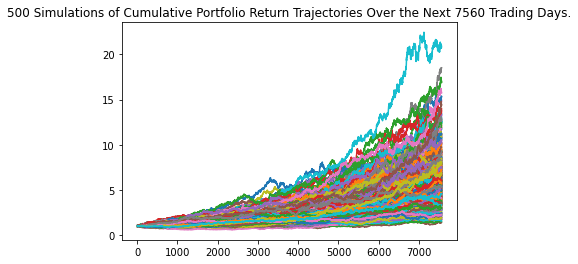

In [42]:
# Plot simulation outcomes
mc_thirtyyear.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

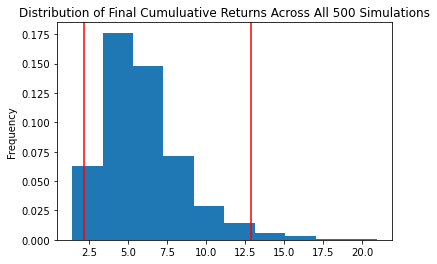

In [43]:
# Plot probability distribution and confidence intervals
mc_thirtyyear.plot_distribution()

### Retirement Analysis

In [64]:
# Fetch summary statistics from the Monte Carlo simulation results
mcsummary_statistics = mc_thirtyyear.summarize_cumulative_return()
# Print summary statistics
print(mcsummary_statistics)

count           500.000000
mean              5.973303
std               2.745891
min               1.389187
25%               4.175588
50%               5.496855
75%               7.222137
max              20.902982
95% CI Lower      2.157543
95% CI Upper     12.840113
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [65]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = mc_thirtyyear.summarize_cumulative_return()[8] * initial_investment
ci_upper = mc_thirtyyear.summarize_cumulative_return()[9] * initial_investment

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower:0.2f} and ${ci_upper:0.2f}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $43150.87 and $256802.26


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [66]:
# Set initial investment
initial_investment = 30000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = (mc_thirtyyear.summarize_cumulative_return()[8] * initial_investment) * 1.5
ci_upper = (mc_thirtyyear.summarize_cumulative_return()[9] * initial_investment) * 1.5

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower:0.2f} and ${ci_upper:0.2f}")

There is a 95% chance that an initial investment of $45000.0 in the portfolio over the next 30 years will end within in the range of $145634.18 and $866707.62


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [48]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
mc_fiveyear = MCSimulation(df_stock_data,[0.85,0.15], 500, 252*5)

In [49]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
print(mc_fiveyear)

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

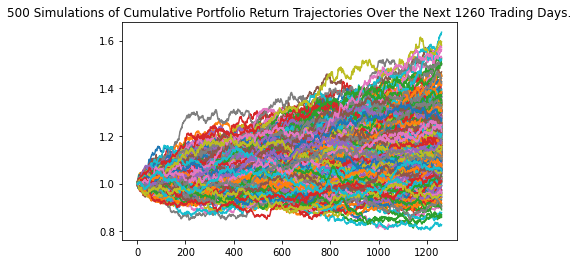

In [50]:
# Plot simulation outcomes
mc_fiveyear.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

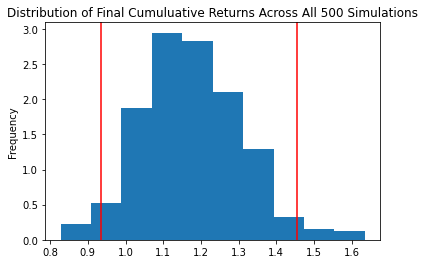

In [51]:
# Plot probability distribution and confidence intervals
mc_fiveyear.plot_distribution()

In [52]:
# Fetch summary statistics from the Monte Carlo simulation results
mcsummary_statistics_fiveyear = mc_fiveyear.summarize_cumulative_return()

# Print summary statistics
mcsummary_statistics_fiveyear

count           500.000000
mean              1.178019
std               0.133418
min               0.827462
25%               1.085451
50%               1.169753
75%               1.263283
max               1.635310
95% CI Lower      0.935916
95% CI Upper      1.454456
Name: 1260, dtype: float64

In [61]:
# Set initial investment
initial_investment2 = 60000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = mc_fiveyear.summarize_cumulative_return()[8] * initial_investment2
ci_upper_five = mc_fiveyear.summarize_cumulative_return()[9] * initial_investment2

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five:0.2f} and ${ci_upper_five:0.2f}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $56154.98 and $87267.34


### Ten Years Retirement Option

In [54]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
mc_tenyear = MCSimulation(df_stock_data,[0.6,0.4], 500, 252*10)

In [55]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
print(mc_tenyear)

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

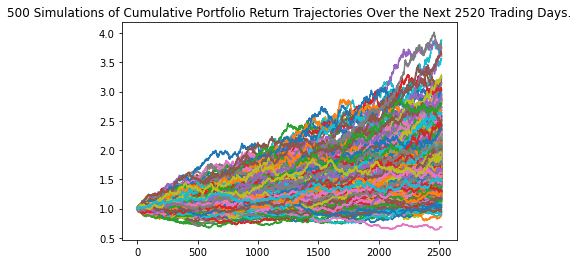

In [56]:
# Plot simulation outcomes
mc_tenyear.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

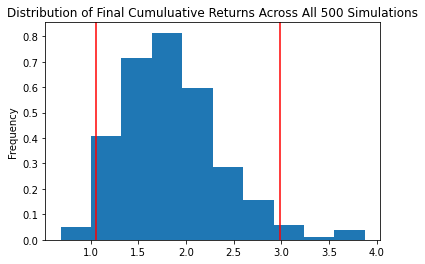

In [57]:
# Plot probability distribution and confidence intervals
mc_tenyear.plot_distribution()

In [58]:
# Fetch summary statistics from the Monte Carlo simulation results
mc_tenyear_return = mc_tenyear.summarize_cumulative_return()
# Print summary statistics
print(mc_tenyear_return)

count           500.000000
mean              1.851487
std               0.517223
min               0.683414
25%               1.476614
50%               1.772931
75%               2.145918
max               3.877871
95% CI Lower      1.057386
95% CI Upper      2.992170
Name: 2520, dtype: float64


In [60]:
# Set initial investment
initial_investment = 60000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = mc_tenyear.summarize_cumulative_return()[8] * initial_investment
ci_upper_ten = mc_tenyear.summarize_cumulative_return()[9] * initial_investment
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten:0.2f} and ${ci_upper_ten:0.2f}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $63443.14 and $179530.17
